In [183]:
import numpy as np
import time

from pandas import Series
import pandas as pd
from pandas import DataFrame

import matplotlib
import matplotlib.pyplot as plt

In [115]:
df = pd.read_csv('subj_measures.csv',sep = ',')
df.head()

,date,user_id,type,value
0,2019-06-08T23:19:34.418Z,61,mood,2.76
1,2019-06-13T16:33:34.399Z,26,sleep,2.44
2,2018-12-26T14:24:00.436Z,10,sleep,1.88
3,2019-07-17T20:11:23.792Z,33,mood,2.20
4,2019-05-09T17:27:50.900Z,17,mood,4.00


In [116]:
piv_df = pd.pivot_table(df,index=['user_id'],values = ['value'],columns = ['type'])
print(np.round(piv_df,1))
avg_df = df.groupby('type').mean()['value']
print(avg_df)

                     value                            
type    anticipatoryStress mood ruminationStress sleep
user_id                                               
0                      4.0  2.6              NaN   2.7
1                      2.9  2.4              3.5   2.5
2                      1.5  2.1              2.0   2.3
3                      2.8  2.2              2.2   1.7
4                      3.3  2.7              2.9   2.4
...                    ...  ...              ...   ...
95                     1.4  2.1              NaN   2.4
96                     3.9  2.7              3.4   2.2
97                     2.4  2.4              1.3   2.6
98                     1.1  2.2              2.0   1.8
99                     2.7  2.2              3.2   1.8

[100 rows x 4 columns]
type
anticipatoryStress    2.495910
mood                  2.404216
ruminationStress      2.353558
sleep                 2.404878
Name: value, dtype: float64


The table above gives me an idea of the status of each patient compared to the overall wellbeing of every patient within the system. Although knowing that the average status of a person using this application is not the status of a healthy person, we can still use the data to pinpoint users that are suffering greater, or at least inputting that they are suffering more than your average user. This gives us information about how users are doing compared to the average user, however we also need to consider how a person is doing overtime. The most helpful way to view this information would be to create a table that shows the users overall average, and then compares it to their most recent input. The below table shows this comparison for mood. The latest mood column is their latest submission for how they are feeling, compared to their overall average. This could be used to send out custom notifications with encouragement depending on if their mood is higher or lower than average.

In [ ]:
from datetime import datetime
def getObj(row):
    return datetime.strptime(row['date'][:-1], '%Y-%m-%dT%H:%M:%S.%f')

In [119]:

df['dateObj'] = df.apply(getObj, axis=1)

print(df.head())

#This allowed me to create a date object from the timestamp

                       date  user_id   type  value                 dateObj
0  2019-06-08T23:19:34.418Z       61   mood   2.76 2019-06-08 23:19:34.418
1  2019-06-13T16:33:34.399Z       26  sleep   2.44 2019-06-13 16:33:34.399
2  2018-12-26T14:24:00.436Z       10  sleep   1.88 2018-12-26 14:24:00.436
3  2019-07-17T20:11:23.792Z       33   mood   2.20 2019-07-17 20:11:23.792
4  2019-05-09T17:27:50.900Z       17   mood   4.00 2019-05-09 17:27:50.900


In [121]:
idx = df[df.type == 'mood'].groupby(['user_id'])['dateObj'].transform(max) == df[df.type == 'mood']['dateObj']
max_mood = df[df.type == 'mood'][idx].sort_values(by=['user_id'])
#print(max_mood)
moodpiv_df = pd.pivot_table(df[df.type == "mood"],index=['user_id'],values = ['value'],columns = ['type'])
#print(newavg_df)
print(pd.merge(max_mood, moodpiv_df, how='left',
        left_on='user_id', right_on='user_id').rename(columns={'value':'latest mood'}))


                        date  user_id  type  latest mood  \
0   2019-04-16T12:12:20.853Z        0  mood     2.000000   
1   2019-06-26T13:23:52.024Z        1  mood     1.000000   
2   2019-07-13T13:00:21.548Z        2  mood     1.240000   
3   2019-07-23T12:10:33.251Z        3  mood     3.000000   
4   2019-07-11T02:56:17.407Z        4  mood     2.682529   
..                       ...      ...   ...          ...   
95  2019-07-19T00:16:29.115Z       95  mood     2.764932   
96  2019-06-30T20:03:53.207Z       96  mood     2.280000   
97  2019-07-24T12:30:53.531Z       97  mood     2.193058   
98  2019-07-15T13:05:31.029Z       98  mood     3.656131   
99  2019-06-19T03:53:26.823Z       99  mood     1.000000   

                   dateObj  (value, mood)  
0  2019-04-16 12:12:20.853       2.620741  
1  2019-06-26 13:23:52.024       2.363033  
2  2019-07-13 13:00:21.548       2.132229  
3  2019-07-23 12:10:33.251       2.167215  
4  2019-07-11 02:56:17.407       2.667656  
..             

I also think it is of course very helpful to view a single person's status overtime. In this case, I will make a plot to track the four types of data points we are collecting. To choose a person, I created a code to select the person that has submitted an update the most amount of times. However, the person I chose had updated 539 times which made a very messy graph unfortunately. In order to get the best graph for that person, I would have to average data points from a range of dates and then graph the averages. So instead, I chose user 4 who had updated 82 times, which makes a cleaner graph for this example.

In [164]:
count = df.groupby(['user_id']).count()
#print(count)
#count.loc[count['type'].idxmax()]

         date  type  value  dateObj
user_id                            
0          20    20     20       20
1          24    24     24       24
2          20    20     20       20
3          17    17     17       17
4          82    82     82       82
...       ...   ...    ...      ...
95         58    58     58       58
96         37    37     37       37
97        165   165    165      165
98         51    51     51       51
99         22    22     22       22

[100 rows x 4 columns]


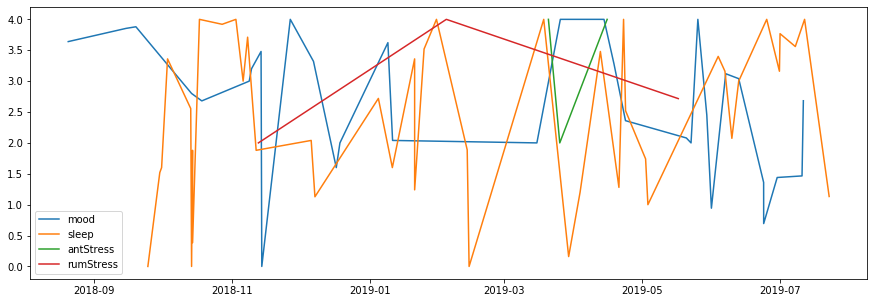

In [181]:

user4_mood = df[(df.user_id == 4) & (df.type == 'mood')].sort_values(by=['dateObj'])
user4_sleep = df[(df.user_id == 4) & (df.type == 'sleep')].sort_values(by=['dateObj'])
user4_antStress = df[(df.user_id == 4) & (df.type == 'anticipatoryStress')].sort_values(by=['dateObj'])
user4_rumStress = df[(df.user_id == 4) & (df.type == 'ruminationStress')].sort_values(by=['dateObj'])

plt.figure(figsize=(15,5))
plt.plot( 'dateObj', 'value', data=user4_mood,label = 'mood')
plt.plot( 'dateObj', 'value', data=user4_sleep,label = 'sleep')
plt.plot( 'dateObj', 'value', data=user4_antStress, label = 'antStress')
plt.plot( 'dateObj', 'value', data=user4_rumStress,label = 'rumStress')
plt.legend()

This graph shows some interesting points about user 4. It seems like they tend to graph mood and sleep much more often than ruminationStress or anticipatoryStress. This leads me to wonder if other users tend to avoid using those stress indicators, and if so, why would they choose to not use it? Is it harder to rank such a specific feeling of stress level? Is there something that could be done to help a person realize the importance of tracking their stress along with their mood and sleep? Would it help if they specifically tracked stress about a certain event/topic? Does it raise their stress to consider how stressed they feel currently? Whether one sleeps well or not, or how happy they are feeling, are relatively easy to track compared to stress, an emotion that is often told to be bottled up instead of analyzed. Even the absence of stress data in this case could lead us to interesting conclusions about what users are able to track.

To answer your question about what other data points would be helpful to track, I thought that timezone would be useful. Since the dates are all within the same timezone, you can't separate the data into time periods. I think it would be very interesting to see the percentage of people that are inputting data at 8am when you send out the notifications. This would let us know if the notifications are useful, or if people are inputting data at their own preferred time. Sleep is useful to be input in the morning, however would it be better to remind a user about mood or stress later in the day after they have the day's events affect them? It would also be interesting to track if a user tends to stress more during the morning, or evening. If during a specific time of the day, the user tends to be sadder or more stressed, this would be interesting/useful information for a doctor. Another interesting data point would be what the user is currently doing when they input the data. Are they at work? Are they watching tv? Are they with family? What is triggering them to think about a change in their mood or stress level? Tracking certain triggers would be interesting to view alongside the data.